## Experiment design

We are overhauling the experimental design (i.e. stimuli) for the upcoming V1 acute experiment - expected start date is the week of December 11th, 2017. Now that our interest lies in the interaction between contrast and spectral dispersion rather than just spectral dispersion, we will present our stimuli at more contrasts. To compensate for more contrasts, we will reduce the number of dispersion families.

We also plan to more carefully choose our contrasts and spatial frequencies of both our single gratings and our dispersed stimuli so that we can completely make linear predictions for all presented stimuli. In short, any grating which appears as part of a dispersed grating will also be presented in isolation with the exact same contrast and spatial frequency. To ensure compatability of the data sets, we hope to keep the contrast profile (as a function of spatial frequency) similar to that used in the previous sfMix experiment.

In [1]:
import numpy as np
import os
from scipy.stats import norm

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pltSave
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

verbose = 1; # print some output?
save_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/altExp/stimuli';

### Previous experimental design

In [2]:
sfCenters = np.logspace(np.log10(0.3), np.log10(10), 11)

nGrats = 9; # 9 gratings make up the stimulus
dispSpread = 1.5; # 1.5 octaves on either side of the center
octSeries = np.linspace(dispSpread, -dispSpread, nGrats)
octStep = np.abs(np.unique(np.diff(octSeries)))

nFam = 5;
spreadVec = np.logspace(np.log10(.125), np.log10(1.25), nFam);
conProf = np.zeros((nFam, nGrats));
for i in range(nFam):
    profTemp = norm.pdf(octSeries, 0, spreadVec[i]);
    conProf[i] = profTemp / np.sum(profTemp)
    if i == 0:
        conProf[i] = np.round(conProf[i], 0) # we made the lowest dispersion just a single grating
    
if verbose:
    print('The spatial frequency centers were: ' + str(np.round(sfCenters, 2)));
    print('The gratings of each dispersed stimuli were separated by ' + str(np.round(octStep[0], 3)) + ' octaves');
    print('The contrast profiles are as follows:')
    for i in range(nFam):
        print('Family ' + str(i+1) + ': ' + str(np.round(conProf[i], 3)))

The spatial frequency centers were: [ 0.3   0.43  0.6   0.86  1.22  1.73  2.46  3.49  4.96  7.04 10.  ]
The gratings of each dispersed stimuli were separated by 0.375 octaves
The contrast profiles are as follows:
Family 1: [0. 0. 0. 0. 1. 0. 0. 0. 0.]
Family 2: [0.    0.    0.002 0.162 0.672 0.162 0.002 0.    0.   ]
Family 3: [0.    0.007 0.063 0.241 0.378 0.241 0.063 0.007 0.   ]
Family 4: [0.022 0.06  0.122 0.187 0.216 0.187 0.122 0.06  0.022]
Family 5: [0.071 0.097 0.121 0.139 0.145 0.139 0.121 0.097 0.071]


In [3]:
nCondSfMix = nFam*2*len(sfCenters) # 2 for 2 contrasts (high/low)
nCondCRF = 10; # 10 contrasts, 1 SF
nCondOri = 16; # ori16
nTrials = 10*(nCondSfMix + nCondCRF + nCondOri);
if verbose:
    print('Experiment length (in minutes) without blanks: ' + str(np.round(nTrials/60.0, 2)))

Experiment length (in minutes) without blanks: 22.67


### Shifting the spatial frequencies

In the Expo program, we have a free parameter "sfRel" which permits a shifting of the spatial frequencies used. For example, if a cell has a fairly low high-frequency cutoff, we can have sfRel lower than the "standard" (1.73) so that more spatial frequencies are in the pass-band of such a low-pass cell.

In [4]:
defaultSfs = np.logspace(np.log10(0.3), np.log10(10), 11)
sfAnchor = np.median(defaultSfs);
sfMult = sfAnchor / defaultSfs
if verbose:
    print('SF multipliers are:\n\t' + str(np.round(np.sort(sfMult), 6)))

SF multipliers are:
	[0.173205 0.245951 0.34925  0.495934 0.704226 1.       1.419998 2.016396
 2.863279 4.065851 5.773503]


In [5]:
sfRel = 1.73
sfShifts = sfRel * sfMult
if verbose:
    print('With sfRel ' + str(sfRel) + ' cpd, new sfCenters are\n\t' + str(np.round(np.sort(sfShifts), 2)))

With sfRel 1.73 cpd, new sfCenters are
	[0.3  0.43 0.6  0.86 1.22 1.73 2.46 3.49 4.95 7.03 9.99]


## New experimental design

### First attempt:

In [6]:
sfAll[int(sfsLost[1]/2):nSfsTot-int(sfsLost[1]/2)]

NameError: name 'sfAll' is not defined

In [7]:
nDisps = 4;

nSfsTot = 11;
sfsLost = [0, 2, 4, 6];
sfMin = 0.3;
sfMax = 10;

nSfCenters = np.subtract(nSfsTot, sfsLost)
sfAll = np.logspace(np.log10(sfMin), np.log10(sfMax), nSfsTot)
sfCenters = [sfAll[sfsLost[0]:nSfsTot-sfsLost[0]], sfAll[int(sfsLost[1]/2):nSfsTot-int(sfsLost[1]/2)], 
             sfAll[int(sfsLost[2]/2):nSfsTot-int(sfsLost[2]/2)], sfAll[int(sfsLost[3]/2):nSfsTot-int(sfsLost[3]/2)]];

nCons = 9;
nSfMixCons = 4;
conMin = 0.05;
conMax = 1;

if verbose:
    for i in range(nDisps):
        print('Dispersion level ' + str(i+1) + ' sf centers:' + str(np.round(sfCenters[i], 2)))

Dispersion level 1 sf centers:[ 0.3   0.43  0.6   0.86  1.22  1.73  2.46  3.49  4.96  7.04 10.  ]
Dispersion level 2 sf centers:[0.43 0.6  0.86 1.22 1.73 2.46 3.49 4.96 7.04]
Dispersion level 3 sf centers:[0.6  0.86 1.22 1.73 2.46 3.49 4.96]
Dispersion level 4 sf centers:[0.86 1.22 1.73 2.46 3.49]


In [8]:
logCons = np.logspace(np.log10(conMin), np.log10(conMax), nCons);
if verbose:
    print('Con min = ' + str(conMin) + '; Con max = ' + str(conMax) + '; use ' + str(nCons) + ' contrasts')
    print('If we logarithmically space the contrasts, we get the following:\n\t' + str(np.round(logCons, 3)))
    print('Rounded to the nearest hundredth, we get:\n\t' + str(np.round(logCons, 2)))

Con min = 0.05; Con max = 1; use 9 contrasts
If we logarithmically space the contrasts, we get the following:
	[0.05  0.073 0.106 0.154 0.224 0.325 0.473 0.688 1.   ]
Rounded to the nearest hundredth, we get:
	[0.05 0.07 0.11 0.15 0.22 0.33 0.47 0.69 1.  ]


In [9]:
profs = [];

In [10]:
profs.append([]);
d1cent = -1;
d2cent = 7;
d3cent = 5;
d4cent = 5;
profs[0].append([logCons[d1cent]]);
profs[0].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
profs[0].append([logCons[d3cent-3], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-3]]);
profs[0].append([logCons[d4cent-4], logCons[d4cent-3], logCons[d4cent-2], logCons[d4cent], logCons[d4cent-2], logCons[d4cent-3], logCons[d4cent-4]]);
# profs1.append([logCons[1], logCons[2], logCons[3], logCons[4], logCons[3], logCons[2], logCons[1]])

if verbose:
    print('Total contrast = 1')
    for i in range(nDisps):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[0][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[0][i]), 2)))

Total contrast = 1
Family 1: [1.] /// sum = 1.0
Family 2: [0.154 0.688 0.154] /// sum = 1.0
Family 3: [0.106 0.224 0.325 0.224 0.106] /// sum = 0.98
Family 4: [0.073 0.106 0.154 0.325 0.154 0.106 0.073] /// sum = 0.99


In [11]:
profs.append([]);
d1cent = -2;
d2cent = 6;
d3cent = 4;
d4cent = 4;
profs[1].append([logCons[-2]]);
profs[1].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
profs[1].append([logCons[d3cent-3], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-3]]);
profs[1].append([logCons[d4cent-4], logCons[d4cent-3], logCons[d4cent-2], logCons[d4cent], logCons[d4cent-2], logCons[d4cent-3], logCons[d4cent-4]]);

if verbose:
    print('Total contrast = ' + str(np.round(logCons[d1cent], 2)))
    for i in range(nDisps):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[1][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[1][i]), 2)))

Total contrast = 0.69
Family 1: [0.688] /// sum = 0.69
Family 2: [0.106 0.473 0.106] /// sum = 0.68
Family 3: [0.073 0.154 0.224 0.154 0.073] /// sum = 0.68
Family 4: [0.05  0.073 0.106 0.224 0.106 0.073 0.05 ] /// sum = 0.68


In [12]:
profs.append([]);
d1cent = -3;
d2cent = 5;
d3cent = 3;
profs[2].append([logCons[d1cent]]);
profs[2].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
profs[2].append([logCons[d3cent-3], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-3]]);
# profs.append([logCons[0], logCons[1], logCons[2], logCons[3], logCons[2], logCons[1], logCons[0]])

if verbose:
    print('Total contrast = ' + str(np.round(logCons[d1cent], 2)))
    for i in range(nDisps-1):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[2][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[2][i]), 2)))

Total contrast = 0.47
Family 1: [0.473] /// sum = 0.47
Family 2: [0.073 0.325 0.073] /// sum = 0.47
Family 3: [0.05  0.106 0.154 0.106 0.05 ] /// sum = 0.47


In [13]:
profs.append([]);
d1cent = -4;
d2cent = 4;
d3cent = 2;
profs[3].append([logCons[d1cent]]);
profs[3].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
# profs[3].append([logCons[d3cent-2], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-2]]);
# profs.append([logCons[0], logCons[1], logCons[2], logCons[3], logCons[2], logCons[1], logCons[0]])

if verbose:
    print('Total contrast = ' + str(np.round(logCons[d1cent], 2)))
    for i in range(nDisps-2):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[3][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[3][i]), 2)))

Total contrast = 0.33
Family 1: [0.325] /// sum = 0.33
Family 2: [0.05  0.224 0.05 ] /// sum = 0.32


Now we check the ratios; note that I changed the "formula" for the the third level of dispersion at the lowest contrast

In [14]:
print('Total contrasts: ' + str(np.round(logCons[5:], 3)))
for d in range(nDisps):
    print('\nDispersion level: ' + str(d+1));
    print('The ratio of contrasts by component are: ')
    for c in range(len(profs[d])): # how many contrasts?
        rat = np.divide(profs[c][d], profs[0][d]);
        print('\tratio: ' + str(np.round(rat, 3)))

Total contrasts: [0.325 0.473 0.688 1.   ]

Dispersion level: 1
The ratio of contrasts by component are: 
	ratio: [1.]
	ratio: [0.688]
	ratio: [0.473]
	ratio: [0.325]

Dispersion level: 2
The ratio of contrasts by component are: 
	ratio: [1. 1. 1.]
	ratio: [0.688 0.688 0.688]
	ratio: [0.473 0.473 0.473]
	ratio: [0.325 0.325 0.325]

Dispersion level: 3
The ratio of contrasts by component are: 
	ratio: [1. 1. 1. 1. 1.]
	ratio: [0.688 0.688 0.688 0.688 0.688]
	ratio: [0.473 0.473 0.473 0.473 0.473]

Dispersion level: 4
The ratio of contrasts by component are: 
	ratio: [1. 1. 1. 1. 1. 1. 1.]
	ratio: [0.688 0.688 0.688 0.688 0.688 0.688 0.688]


And how many conditions? I.e. how much experimental time will be needed?

In [15]:
nConds = nCons*nSfCenters[0] + nSfMixCons*nSfCenters[1] + nSfMixCons*nSfCenters[2]
if verbose:
    print('Experiment length (in minutes) without blanks: ' + str(np.round(nConds*10/60.0, 2)))

Experiment length (in minutes) without blanks: 27.17


### Brief design

Particularly for our LGN recordings, we should have a shorter version of the experiment on hand in case we are unsure of cell/recording stability

In [18]:
disps = [0, 1, 2, 3];
nDisps = len(disps);

nSfsTot = 11;
sfsLost = [0, 2, 4, 6];
sfCenter = 1.72; # in cpd
baseMult = 0.5; # in octaves

nSfCenters = np.subtract(nSfsTot, sfsLost)
sfAll = [sfCenter * np.power(2, x*baseMult) for x in np.linspace(-np.floor(nSfsTot/2), np.floor(nSfsTot/2), nSfsTot)]
sfCenters = [sfAll[sfsLost[0]:nSfsTot-sfsLost[0]], sfAll[int(sfsLost[1]/2):nSfsTot-int(sfsLost[1]/2)], 
             sfAll[int(sfsLost[2]/2):nSfsTot-int(sfsLost[2]/2)], sfAll[int(sfsLost[3]/2):nSfsTot-int(sfsLost[3]/2)]];

nCons = 9;
nSfMixCons = 4;
conMin = 0.05;
conMax = 1;

if verbose:
    for i in range(nDisps):
        print('Dispersion level ' + str(i+1) + ' sf centers:' + str(np.round(sfCenters[i], 2)))

Dispersion level 1 sf centers:[0.3  0.43 0.61 0.86 1.22 1.72 2.43 3.44 4.86 6.88 9.73]
Dispersion level 2 sf centers:[0.43 0.61 0.86 1.22 1.72 2.43 3.44 4.86 6.88]
Dispersion level 3 sf centers:[0.61 0.86 1.22 1.72 2.43 3.44 4.86]
Dispersion level 4 sf centers:[0.86 1.22 1.72 2.43 3.44]


In [19]:
logCons = np.logspace(np.log10(conMin), np.log10(conMax), nCons);
if verbose:
    print('Con min = ' + str(conMin) + '; Con max = ' + str(conMax) + '; use ' + str(nCons) + ' contrasts')
    print('If we logarithmically space the contrasts, we get the following:\n\t' + str(np.round(logCons, 3)))
    print('Rounded to the nearest hundredth, we get:\n\t' + str(np.round(logCons, 2)))

Con min = 0.05; Con max = 1; use 9 contrasts
If we logarithmically space the contrasts, we get the following:
	[0.05  0.073 0.106 0.154 0.224 0.325 0.473 0.688 1.   ]
Rounded to the nearest hundredth, we get:
	[0.05 0.07 0.11 0.15 0.22 0.33 0.47 0.69 1.  ]


In [20]:
profs = [];

In [21]:
profs.append([]);
d1cent = -1;
d2cent = 7;
d3cent = 5;
d4cent = 5;
profs[0].append([logCons[d1cent]]);
profs[0].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
profs[0].append([logCons[d3cent-3], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-3]]);
profs[0].append([logCons[d4cent-4], logCons[d4cent-3], logCons[d4cent-2], logCons[d4cent], logCons[d4cent-2], logCons[d4cent-3], logCons[d4cent-4]]);
# profs1.append([logCons[1], logCons[2], logCons[3], logCons[4], logCons[3], logCons[2], logCons[1]])

if verbose:
    print('Total contrast = 1')
    for i in range(nDisps):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[0][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[0][i]), 2)))

Total contrast = 1
Family 1: [1.] /// sum = 1.0
Family 2: [0.154 0.688 0.154] /// sum = 1.0
Family 3: [0.106 0.224 0.325 0.224 0.106] /// sum = 0.98
Family 4: [0.073 0.106 0.154 0.325 0.154 0.106 0.073] /// sum = 0.99


In [22]:
profs.append([]);
d1cent = -2;
d2cent = 6;
d3cent = 4;
d4cent = 4;
profs[1].append([logCons[-2]]);
profs[1].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
profs[1].append([logCons[d3cent-3], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-3]]);
profs[1].append([logCons[d4cent-4], logCons[d4cent-3], logCons[d4cent-2], logCons[d4cent], logCons[d4cent-2], logCons[d4cent-3], logCons[d4cent-4]]);

if verbose:
    print('Total contrast = ' + str(np.round(logCons[d1cent], 2)))
    for i in range(nDisps):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[1][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[1][i]), 2)))

Total contrast = 0.69
Family 1: [0.688] /// sum = 0.69
Family 2: [0.106 0.473 0.106] /// sum = 0.68
Family 3: [0.073 0.154 0.224 0.154 0.073] /// sum = 0.68
Family 4: [0.05  0.073 0.106 0.224 0.106 0.073 0.05 ] /// sum = 0.68


In [23]:
profs.append([]);
d1cent = -3;
d2cent = 5;
d3cent = 3;
profs[2].append([logCons[d1cent]]);
profs[2].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
profs[2].append([logCons[d3cent-3], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-3]]);
# profs.append([logCons[0], logCons[1], logCons[2], logCons[3], logCons[2], logCons[1], logCons[0]])

if verbose:
    print('Total contrast = ' + str(np.round(logCons[d1cent], 2)))
    for i in range(nDisps-1):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[2][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[2][i]), 2)))

Total contrast = 0.47
Family 1: [0.473] /// sum = 0.47
Family 2: [0.073 0.325 0.073] /// sum = 0.47
Family 3: [0.05  0.106 0.154 0.106 0.05 ] /// sum = 0.47


In [24]:
profs.append([]);
d1cent = -4;
d2cent = 4;
d3cent = 2;
profs[3].append([logCons[d1cent]]);
profs[3].append([logCons[d2cent-4], logCons[d2cent], logCons[d2cent-4]]);
# profs[3].append([logCons[d3cent-2], logCons[d3cent-1], logCons[d3cent], logCons[d3cent-1], logCons[d3cent-2]]);
# profs.append([logCons[0], logCons[1], logCons[2], logCons[3], logCons[2], logCons[1], logCons[0]])

if verbose:
    print('Total contrast = ' + str(np.round(logCons[d1cent], 2)))
    for i in range(nDisps-2):
        print('Family ' + str(i+1) + ': ' + str(np.round(profs[3][i], 3)) + ' /// sum = ' + str(np.round(np.sum(profs[3][i]), 2)))

Total contrast = 0.33
Family 1: [0.325] /// sum = 0.33
Family 2: [0.05  0.224 0.05 ] /// sum = 0.32


Now we check the ratios; note that I changed the "formula" for the the third level of dispersion at the lowest contrast

In [25]:
print('Total contrasts: ' + str(np.round(logCons[5:], 3)))
for d in disps:
    currDisp = d + 1;
    print('\nDispersion level: ' + str(currDisp));
    print('The ratio of contrasts by component are: ')
    for c in range(len(profs[d])): # how many contrasts?
        rat = np.divide(profs[c][d], profs[0][d]);
        print('\tratio: ' + str(np.round(rat, 3)))

Total contrasts: [0.325 0.473 0.688 1.   ]

Dispersion level: 1
The ratio of contrasts by component are: 
	ratio: [1.]
	ratio: [0.688]
	ratio: [0.473]
	ratio: [0.325]

Dispersion level: 2
The ratio of contrasts by component are: 
	ratio: [1. 1. 1.]
	ratio: [0.688 0.688 0.688]
	ratio: [0.473 0.473 0.473]
	ratio: [0.325 0.325 0.325]

Dispersion level: 3
The ratio of contrasts by component are: 
	ratio: [1. 1. 1. 1. 1.]
	ratio: [0.688 0.688 0.688 0.688 0.688]
	ratio: [0.473 0.473 0.473 0.473 0.473]

Dispersion level: 4
The ratio of contrasts by component are: 
	ratio: [1. 1. 1. 1. 1. 1. 1.]
	ratio: [0.688 0.688 0.688 0.688 0.688 0.688 0.688]


How much experimental time will be needed? How many conditions are there?

In [26]:
singleCons = logCons;
nConsSingle = len(singleCons);

In [27]:
nConds = 0;
for d in disps:
    if d == 0:
        nConds = nConds + nConsSingle*nSfCenters[0]
    else:
        nConds = nConds + len(profs[d])*nSfCenters[d]
nReps = 10;
expLength = np.round(nConds*nReps/60.0, 2);
if verbose:
    print('Experiment length (in minutes) without blanks: ' + str(expLength))
    print('Number of conditions: ' + str(nConds))

Experiment length (in minutes) without blanks: 27.67
Number of conditions: 166


In [28]:
nConsSingle*nSfCenters[0]

99

#### A plot

In [29]:
sfCentRel = sfCenters[0]/np.median(sfCenters[0])
midPtSf = int(np.floor(len(sfCentRel)/2));

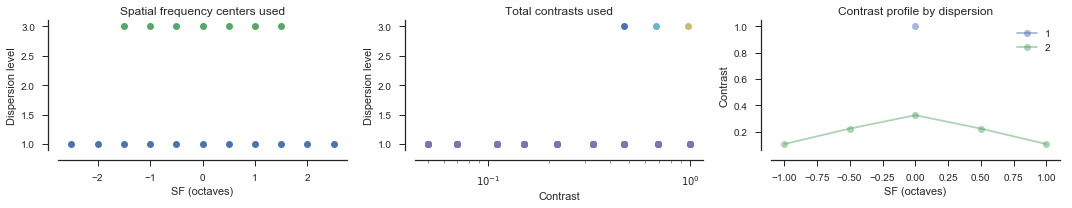

In [32]:
if verbose:
    sns.set_style('ticks');
    f, ax = plt.subplots(1, 3, figsize=(15, 3))
    for i in [0, 2]:
        # SF centers
        curr_sfs = np.log2(np.divide(sfCenters[i], sfCenter));

        ax[0].plot(curr_sfs, np.ones_like(sfCenters[i]) + i, 'o')
        ax[0].set_xlabel('SF (octaves)');
        ax[0].set_ylabel('Dispersion level');
        ax[0].set_title('Spatial frequency centers used')
        
        # Total contrasts
        for j in range(len(profs[i])):
            if len(profs[j]) > i:
                if i == 0:
                    ax[1].semilogx(np.round(singleCons, 2), np.ones_like(singleCons), 'o');
                else:
                    ax[1].semilogx(np.round(np.sum(profs[j][i]), 2), 1 + i, 'o')
                    ax[1].set_xlabel('Contrast');
        ax[1].set_ylabel('Dispersion level');
        ax[1].set_title('Total contrasts used')

        # Contrast profile
        midPtSf = int(np.floor(len(curr_sfs)/2));
        
        ax[2].set_xlabel('SF (octaves)');
        ax[2].set_ylabel('Contrast');
        ax[2].set_title('Contrast profile by dispersion' % (expLength))
#         ax[2].set_title('Contrast profile - %.2f total minutes' % (expLength))
        sfs = curr_sfs[midPtSf - i : midPtSf + i + 1];
        ax[2].plot(sfs, profs[0][i], 'o-', alpha=0.5)
        
    ax[2].legend(['1', '2', '3', '4'])
    sns.despine(offset=10)
    f.tight_layout()
    
pdf = pltSave.PdfPages(str(save_loc + 'stimSet.pdf'))
pdf.savefig(f, bbox_inches="tight")
pdf.close()

### Contrast and opacity

Expo works in layers, and thus opacity must be used rather than contrast (or contrast alone, per se) to manipulate the effective contrast of each stimulus component. The following code, inherited from Robbe Goris, allows one to convert between opacity and contrast.

As coded in Expo, I used contrast to go between overall contrast levels (i.e. total contrast of 1 or 0.68 or etc...) and opacity to determine the contrast of each grating <i>within</i> a given total contrast level

In [321]:
nGrats = 7

#### Contrast to opacity

First, convert the desired contrast distribution into a vector of length nGrats with 0 for no grating and ordered highest to lowest contrast

In [323]:
dispInd = 3; # which dispersion level [0-3]?
totalConInd = 0; # which total contrast level [0-3]?

In [324]:
conSort = np.zeros((nGrats, ))
curr_cons = profs[totalConInd][dispInd]
# conSort[nGrats-len(curr_cons):nGrats] = np.sort(curr_cons)
conSort[0:len(curr_cons)] = np.flip(np.sort(curr_cons), axis=0)

In [325]:
conSort

array([ 0.32517246,  0.15376456,  0.15376456,  0.10573713,  0.10573713,
        0.07271077,  0.07271077])

In [326]:
opac = np.zeros((nGrats, ))

In [327]:
opac[nGrats-1] = conSort[nGrats-1]
opac[nGrats-2] = conSort[nGrats-2]/((1 - opac[nGrats-1]));
opac[nGrats-3] = conSort[nGrats-3]/((1 - opac[nGrats-1])*(1 - opac[nGrats-2]));
opac[nGrats-4] = conSort[nGrats-4]/((1 - opac[nGrats-1])*(1 - opac[nGrats-2])*(1 - opac[nGrats-3]));
opac[nGrats-5] = conSort[nGrats-5]/((1 - opac[nGrats-1])*(1 - opac[nGrats-2])*(1 - opac[nGrats-3])*(1 - opac[nGrats-4]));
opac[nGrats-6] = conSort[nGrats-6]/((1 - opac[nGrats-1])*(1 - opac[nGrats-2])*(1 - opac[nGrats-3])*(1 - opac[nGrats-4])*(1 - opac[nGrats-5]));
opac[nGrats-7] = conSort[nGrats-7]/((1 - opac[nGrats-1])*(1 - opac[nGrats-2])*(1 - opac[nGrats-3])*(1 - opac[nGrats-4])*(1 - opac[nGrats-5])*(1 - opac[nGrats-6]));

In [328]:
if verbose:
    print('Opacity values: ' + str(np.transpose(opac)))

Opacity values: [ 0.9690006   0.3142287   0.23909743  0.14120098  0.12373016  0.07841218
  0.07271077]


#### Opacity to contrast

In [329]:
cons = np.zeros((nGrats, ))

In [330]:
temp = dict()
# usually one constant value across each component for a given value 
temp['con'] = 0.688*np.ones((nGrats, 1))
# input by hand from Expo to check
temp['opa'] = opac
# temp['opa'] = [ 0.993,  0.18170423,  0.15376456,  0.0,  0.0,  0.,          0.        ]

In [331]:
cons[nGrats-1] = temp['con'][nGrats-1]*temp['opa'][nGrats-1];
cons[nGrats-2] = temp['con'][nGrats-2]*temp['opa'][nGrats-2]*(1-temp['opa'][nGrats-1]);
cons[nGrats-3] = temp['con'][nGrats-3]*temp['opa'][nGrats-3]*(1-temp['opa'][nGrats-1])*(1-temp['opa'][nGrats-2]);
cons[nGrats-4] = temp['con'][nGrats-4]*temp['opa'][nGrats-4]*(1-temp['opa'][nGrats-1])*(1-temp['opa'][nGrats-2])*(1-temp['opa'][nGrats-3]);
cons[nGrats-5] = temp['con'][nGrats-5]*temp['opa'][nGrats-5]*(1-temp['opa'][nGrats-1])*(1-temp['opa'][nGrats-2])*(1-temp['opa'][nGrats-3])*(1-temp['opa'][nGrats-4]);
cons[nGrats-6] = temp['con'][nGrats-6]*temp['opa'][nGrats-6]*(1-temp['opa'][nGrats-1])*(1-temp['opa'][nGrats-2])*(1-temp['opa'][nGrats-3])*(1-temp['opa'][nGrats-4])*(1-temp['opa'][nGrats-5]);
cons[nGrats-7] = temp['con'][nGrats-7]*temp['opa'][nGrats-7]*(1-temp['opa'][nGrats-1])*(1-temp['opa'][nGrats-2])*(1-temp['opa'][nGrats-3])*(1-temp['opa'][nGrats-4])*(1-temp['opa'][nGrats-5])*(1-temp['opa'][nGrats-6]);